#### 构建并评价分类模型

In [5]:
# 数据导入
from sklearn.datasets import load_breast_cancer  # load_breast_cancer是一个乳腺癌数据集，datasets中多个已封装的数据集
data = load_breast_cancer()  # 获取数据
x = data["data"]  # x表示输入
y = data["target"]  # y表示输出

In [6]:
# 数据划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
# 数据集的数值查询，确定是否需要进行数据预处理
import numpy as np
x_train.max()
x_train.min()
np.int32(x_train.max(axis=0))  # int32将数据转化为int32类型的数据，axis=0在这里表示输出每一列的最大值
"""经过上述查询发现数值之间差异非常大，因此需要进行数据的差异化处理，这里进行数据的标准差标准化处理"""

'经过上述查询发现数值之间差异非常大，因此需要进行数据的差异化处理，这里进行数据的标准差标准化处理'

In [8]:
# 模型预处理(这里用标准差标准化的处理方法来处理数据集中数据数值差异过大的问题)
from sklearn.preprocessing import StandardScaler
model = StandardScaler().fit(x_train)
x_train_ss = model.transform(x_train)
x_test_ss = model.transform(x_test)

In [11]:
# 分类模型构建
from sklearn.svm import SVC  # 这里构建SVC分类模型
model = SVC().fit(x_train_ss, y_train)  # 构建SVC模型，通过训练集的输入和输出来构建模型
y_pre = model.predict(x_test_ss)  # predict用来预测并得到预测结果
# score用来得到模型的构建分数，这里通过比较测试集的预测输出和真实输出来判断该模型的正确率从而决定是否要进行模型的优化，为1是最佳
model.score(x_test_ss, y_test)  
# score方法并不能很准确的判定模型的优劣，需要额外进行模型的优劣判定

0.9824561403508771

1.0
0.9710144927536232
0.9852941176470589


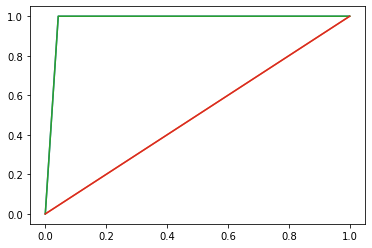

In [12]:
# 模型的评价
"""ecall_score, precision_score, f1_score, roc_curve这4个方法可以来判断模型的优劣"""
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve
print(recall_score(y_test, y_pre))  # 这4个方法都是通过真实输出值和预测输出值来判断优劣，值越靠近1越好
print(precision_score(y_test, y_pre))
print(f1_score(y_test, y_pre))
import matplotlib.pyplot as plt
# fpr, tpr, thresholdss是roc_curve方法的三个返回结果
fpr, tpr, thresholds = roc_curve(y_test, y_pre)
# roc曲线越靠近y轴模型越优
for i in range(2):
    plt.plot(fpr, tpr)  # fpr, tpr作为roc曲线的横坐标和纵坐标
    plt.plot(fpr, fpr)  # 基准线(就是y=x)用来判断模型是否有用，当roc曲线在对角线下方表示模型没用，在上方表示模型可用
plt.show()